In [1]:
import torch
from lavis.models import load_model_and_preprocess
import pandas as pd
import os
from PIL import Image
import logging
import argparse
from torch.utils.data import Dataset
from tqdm import tqdm
import torch.utils.data as data

/homes/yg007/nytimes_project/venv_nyc/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Logger
logger = logging.getLogger()
logging.basicConfig(
    level=os.environ.get("LOGLEVEL", "INFO"),
    format="[%(asctime)s]:[%(processName)-11s]" + "[%(levelname)-s]:[%(name)s] %(message)s",
)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
model, vis_processors, _ = load_model_and_preprocess(name="blip_caption", model_type="base_coco", is_eval=True, device=device)

[2023-11-06 08:03:18,641]:[MainProcess][INFO]:[root] Missing keys []
[2023-11-06 08:03:18,645]:[MainProcess][INFO]:[root] load checkpoint from https://storage.googleapis.com/sfr-vision-language-research/LAVIS/models/BLIP/blip_coco_caption_base.pth


In [5]:
val_feather_path = '../raw_data/val_completed_exist.feather'
val_df = pd.read_feather(val_feather_path)  # already drop the non-exists
val_img_dir = '/import/network-temp/yimengg/data/twitter-comms/images/val_images/val_tweet_image_ids'

Generated caption:
['climate change already being felt in the uk']
Original text:
As #COP26 approaches, how does the UK plan to tackle climate change?

According to scientists, the UK is already undergoing disruptive climate change with increased rainfall, sunshine and temperatures. What now? https://t.co/vaA2AjOTZA

WATCH: https://t.co/iLAQy4utvD

#Newsnight https://t.co/8Wgt9JmytG
Input image:


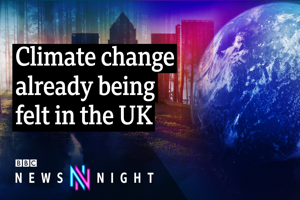

Falsified: False


In [149]:
item = val_df.iloc[0]
text = item['full_text']  # original caption

img_filename = item['filename']
image_path = os.path.join(val_img_dir, img_filename)

raw_image = Image.open(image_path).convert('RGB')
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)
# generate caption
generated_text = model.generate({"image": image}, repetition_penalty=10.0, min_length=10)
# ['a large fountain spewing water into the air']
print(f"Generated caption:\n{generated_text}")
print(f"Original text:\n{text}")
print("Input image:")
display(raw_image.resize((300, 200)))
print(f"Falsified: {item['falsified']}")